# Confusion Matrix

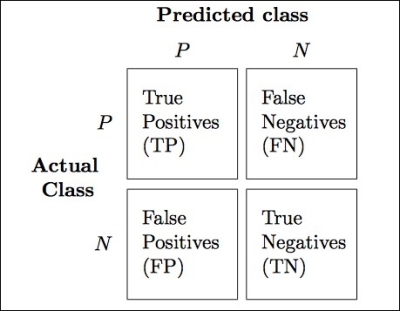

In [1]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/confusion-matrix.jpg")

# Compute Confusion Matrix

In [20]:
%run '6.1 Model Evaluation and HyperParameter Tuning.ipynb'
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
p.fit(X_train, y_train)
y_pred = p.predict(X_test)


Done loading data and pipeline


# Plot Confusion Matrix

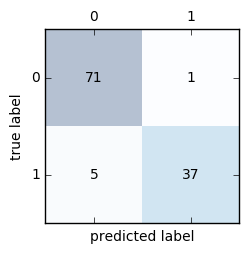

In [19]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Compute Precision, Recall and F1 Score

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print "Precision: %.3f" %(precision_score(y_true=y_test, y_pred=y_pred))
print "Recall: %.3f" %(recall_score(y_true=y_test, y_pred=y_pred))
print "F1: %.3f" %(f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.974
Recall: 0.881
F1: 0.925


# Registering custom scorer

In [49]:
# Remember that the positive class in scikit-learn is the class that is labeled as class 1.
# If we want to specify a different positive label, we can construct our own scorer via
# the make_scorer function, which we can then directly provide as an argument to the 
# scoring parameter in GridSearchCV:

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# custom scorer
scorer = make_scorer(f1_score, pos_label=0)

p = Pipeline([('scl', StandardScaler()),
             ('clf', SVC(random_state=1, probability=True))])

param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{
        'clf__C': param_range,
        'clf__kernel': ['linear']
    }, {
        'clf__C': param_range,
        'clf__kernel': ['rbf'],
        'clf__gamma': param_range
    }]

# using custom scorer with grid search
gs = GridSearchCV(estimator=p,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)

# Plotting a receiver operating characteristic (ROC)

<html>
<ul>
<li> Receiver operator characteristic (ROC) graphs are useful tools for selecting models for classification based on their performance with respect to the false positive and true positive rates</li>
<li> The diagonal of an ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing.</li>
<li> A perfect classifier would fall into the top-left corner of the graph with a true positive rate of 1 and a false positive rate of 0. </li>
<li> Based on the ROC curve, we can then compute the so-called area under the curve (AUC) to characterize the performance of a classification model.</li>
<li> Note: Similar to ROC curves, we can compute precision-recall curves for the different probability thresholds of a classifier.  http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html </li>
</ul>
</html>

0.0 0.0


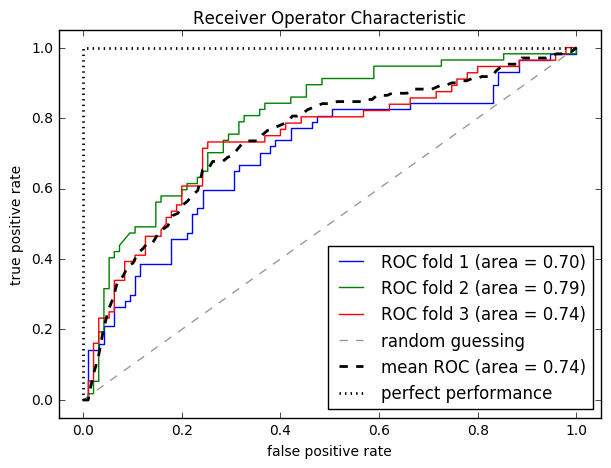

In [59]:
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.cross_validation import StratifiedKFold

#inspect.getargspec(StratifiedKFold)
X_train2 = X_train[:, [4, 14]]

cv = StratifiedKFold(y=y_train, n_folds=3, random_state=1)

fig = plt.figure(figsize=(7, 5))
# mean true and false positive rates
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train,test) in enumerate(cv):
    probas = p.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], 
                                     probas[:, 1], 
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="best")
plt.show()

# Computing ROC AUC score

In [61]:
p = p.fit(X_train2, y_train)
y_pred2 = p.predict(X_test[:, [4, 14]])

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.671
Accuracy: 0.728
